In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.optimize as opt
%matplotlib inline

In [5]:
# clean all files to text files
listdir=os.listdir("235RC/")
for path in listdir:
    if not path.endswith(".txt") and os.path.isfile(os.path.join("235RC",path)):
        print("adding .txt to : ",path)
        os.rename(os.path.join("235RC",path),os.path.join("235RC",path+".txt"))

In [8]:

def npcombinesweep(path1,path2):
    data1=np.genfromtxt(path1,skip_header=1)
    mult1=[  [-1,1]  if x<len(data1)/2 else [1,1] for x in range(len(data1))]
    
    
    data2=np.genfromtxt(path2,skip_header=1)
    mult2=[  [-1,1]  if x>len(data2)/2 else [1,1] for x in range(len(data2))]
    
    data=np.concatenate((data2*mult1,data1*mult2),axis=0)
    np.savetxt(os.path.splitext(path1)[0][:-2]+".txt",data,delimiter='\t',header="Vg\tIds",comments='')
    os.path.splitext(path1)[0][:-2]+".txt"
    os.remove(path1)
    os.remove(path2)
    



def checkduplicates(folder):
    """checks for 2 part files in the directory and combines them in a 1 then 2 format.
    files should be named ABC_runXX-1.txt and ABC_runXX-2 where ABC and XX must be the same in both parts of the data
    but can be any arbitrary strings."""
    listdir=os.listdir(folder)            
    for path in listdir:
        combine=[]
        #this conditional ensures that only 2 part files will be processed by ensuring that there must be
        #a "-" after "run" in the filename indicating multiple parts
        if path[path.find("run"):].find('-')!=-1:
            for path2 in listdir:        
                if path[:-5] in path2 and path!=path2:
                    #ensures that the files are appended in the correct order
                    if path[-5:-4]>path2[-5:-4]:
                        combine=[os.path.join("235RC",path),os.path.join("235RC",path2)]
                    else:
                        combine=[os.path.join("235RC",path2),os.path.join("235RC",path)]
                    npcombinesweep(combine[0],combine[1])
                    print(combine)
                    listdir.remove(path)
                    listdir.remove(path2)
checkduplicates("235RC/")         
            
    





In [4]:
def plotsweepsback(ax,paths,title):
    listir=os.listdir("235RC/")
    for path in paths:
        
        data=np.genfromtxt(path,skip_header=1)
        ax.plot(data[:,0],data[:,1],".-",label="$\pm$"+path[37:37+path[37:].find('u')]+"Vg")
    ax.set_xlabel("Vg (Volts)",fontsize=15)
    ax.set_ylabel("Ids (Amps)",fontsize=15)
    ax.set_title(title,fontsize=15)
    ax.legend()
    
def plotsweepstop(ax,paths,title,labels=1):
    listir=os.listdir("235RC/")
    for path in paths:   
        data=np.genfromtxt(path,skip_header=1)
        if type(labels)!=list:
            ax.plot(data[:,0],data[:,1],".-",label=path[40:40+path[40:].find('u')])
        elif len(label)==len(paths):
            ax.plot(data[:,0],data[:,1],".-",label=labels[paths.find(path)])
        else:
            print("Missmatch between labels and plots")
    ax.set_xlabel("Vg (Volts)",fontsize=15)
    ax.set_ylabel("Ids (Amps)",fontsize=15)
    ax.set_title(title,fontsize=15)
    ax.legend()

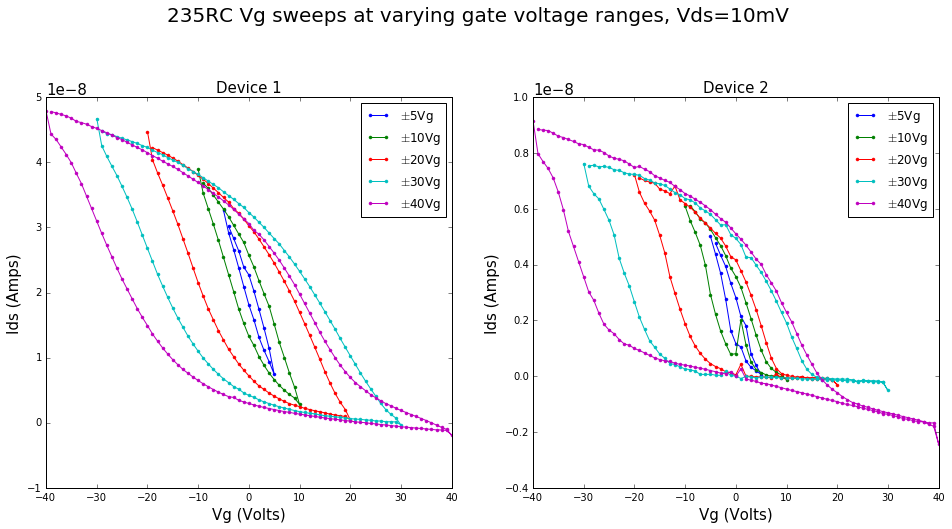

In [25]:
paths1=[
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg5updown_2016-07-01_run7.txt",
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg10updown_2016-07-01_run8.txt",
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg20updown_2016-07-01_run9.txt",
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg30updown_2016-07-01_run10.txt"
     ,"235RC/235RC_pin03-13_VgIds_Vds10mV_Vg40updown_2016-07-04_run3.txt"
]

paths2=[
    "235RC/235RC_pin06-10_VgIds_Vds10mV_Vg5updown_2016-07-03_run3.txt",
    "235RC/235RC_pin06-10_VgIds_Vds10mV_Vg10updown_2016-07-03_run4.txt",
    "235RC/235RC_pin06-10_VgIds_Vds10mV_Vg20updown_2016-07-03_run5.txt",
    "235RC/235RC_pin06-10_VgIds_Vds10mV_Vg30updown_2016-07-03_run6.txt"
    ,"235RC/235RC_pin06-10_VgIds_Vds10mV_Vg40updown_2016-07-04_run4.txt"
]



fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
plotsweepsback(ax1,paths1,"Device 1")
ax2=plt.subplot(122)
plotsweepsback(ax2,paths2,"Device 2")

fig.suptitle("235RC Vg sweeps at varying gate voltage ranges, Vds=10mV",fontsize=20,y=1.08)
offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

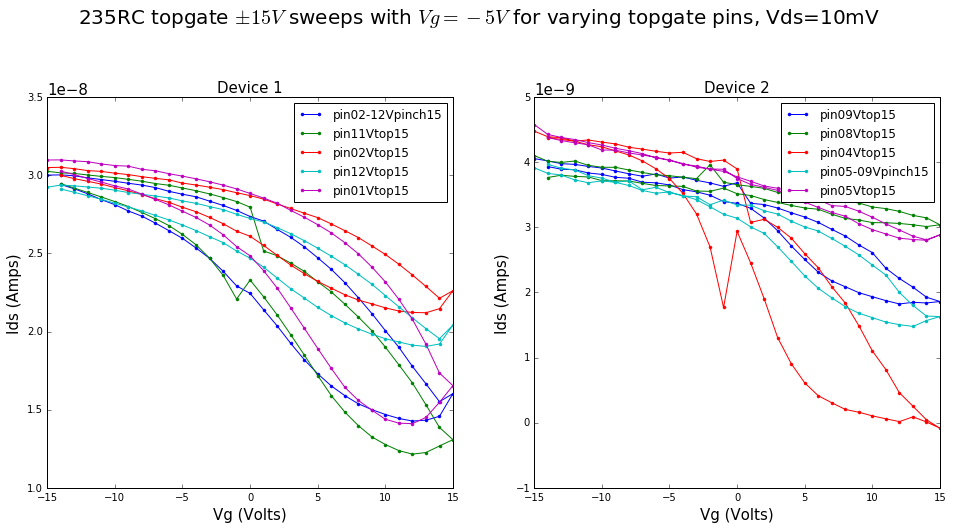

In [26]:
paths1,paths2=[],[]
listdir=os.listdir("235RC/")
for path in listdir:
    if ("top" in path or "pinch" in path) and  "VgIds" in path and "Vg-5" in path:
        if "03-13" in path:
            paths1.append(os.path.join("235RC",path))
        elif "06-10" in path:
            paths2.append(os.path.join("235RC",path))
# print(paths1,paths2)            
fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
plotsweepstop(ax1,paths1,"Device 1")
ax2=plt.subplot(122)
plotsweepstop(ax2,paths2,"Device 2")

fig.suptitle("235RC topgate $\pm15V$ sweeps with $Vg = -5V$ for varying topgate pins, Vds=10mV",fontsize=20,y=1.08)
offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

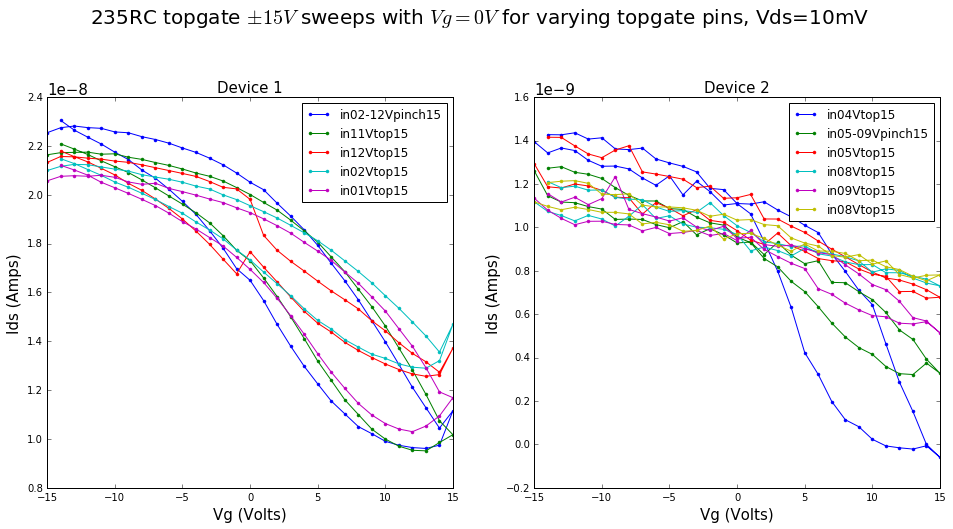

In [29]:
paths1,paths2=[],[]
listdir=os.listdir("235RC/")
for path in listdir:
    if ("top15" in path or "pinch15" in path) and  "VgIds" in path and "Vg0" in path:
        if "03-13" in path:
            paths1.append(os.path.join("235RC",path))
        elif "06-10" in path:
            paths2.append(os.path.join("235RC",path))
# print(paths1,paths2)            
fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
plotsweepstop(ax1,paths1,"Device 1")
ax2=plt.subplot(122)
plotsweepstop(ax2,paths2,"Device 2")

fig.suptitle("235RC topgate $\pm15V$ sweeps with $Vg = 0V$ for varying topgate pins, Vds=10mV",fontsize=20,y=1.08)
offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

['235RC/235RC_pin03-13_VgIds_Vds10mV_Vg0_pin01Vtop30updown_2016-07-05_run26.txt', '235RC/235RC_pin03-13_VgIds_Vds10mV_Vg-20_pin01Vtop30updown_2016-07-05_run27.txt']


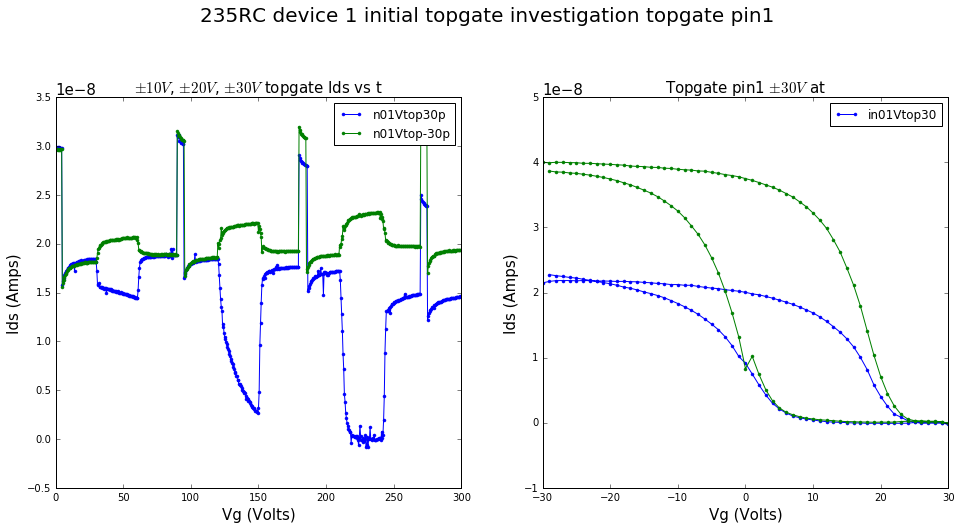

In [18]:
paths1,paths2=[],[]
listdir=os.listdir("235RC/")
for path in listdir:
    if ("top30" in path or "top-30" in path)and "2016-07-05" in path :
        if "IdsT" in path :
            paths1.append(os.path.join("235RC",path))
        elif "VgIds" in path:
            paths2.append(os.path.join("235RC",path))

# print(paths1,paths2)            
fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
plotsweepstop(ax1,paths1,"$\pm 10V$, $\pm 20V$, $\pm 30V$ topgate Ids vs t")
ax2=plt.subplot(122)
plotsweepstop(ax2,paths2,"Topgate pin1 $\pm 30V$ at ")

fig.suptitle("235RC device 1 initial topgate investigation topgate pin1",fontsize=20,y=1.08)
offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)
print(paths2)

/home/leo/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


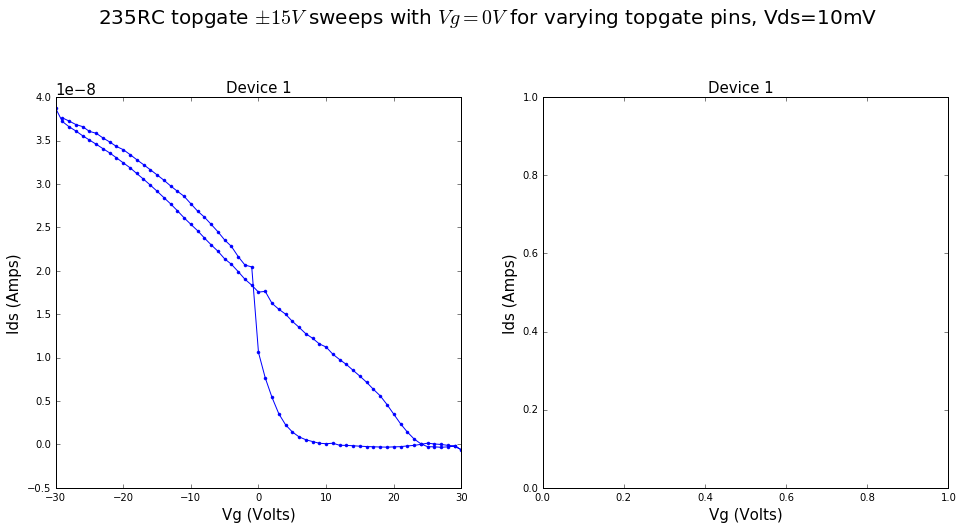

In [5]:
paths1,paths2=[],[]
listdir=os.listdir("235RC/")
for path in listdir:
    if "2016-07-07" in path and "VgIds" in path and "pin01" in path:
#         print(path)
        paths1.append(os.path.join("235RC",path))
    
        

# for path in listdir:
#     if ("Vtop30" in path )and "2016-07-07" in path :
#         if "VgIds" in path :
#             paths1.append(os.path.join("235RC",path))
#         elif "VgIds" in path:
#             paths2.append(os.path.join("235RC",path))

# print(paths1,paths2)            
fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
plotsweepstop(ax1,paths1,"Device 1")
ax2=plt.subplot(122)
plotsweepstop(ax2,paths2,"Device 1  ")

fig.suptitle("235RC topgate $\pm15V$ sweeps with $Vg = 0V$ for varying topgate pins, Vds=10mV",fontsize=20,y=1.08)
offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)